In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


coordinates = list(lat_lngs)

from citipy import citipy



In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [4]:
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
#Create an empty list to hold the weather data
city_data= []
#Print the beginning of the logginh
print("Beggining Data Retrieval.       ")
print("--------------------------------")

#Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beggining Data Retrieval.       
--------------------------------
Processing Record 1 of Set 1 | potosi
Processing Record 2 of Set 1 | bereda
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | poum
Processing Record 7 of Set 1 | havelock
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | kothi
Processing Record 10 of Set 1 | aquiraz
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | nurota
Processing Record 17 of Set 1 | dali
Processing Record 18 of Set 1 | songjianghe
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | airai
Processing Record 23 of Set 1 | paci

Processing Record 37 of Set 4 | boulder
Processing Record 38 of Set 4 | alice springs
Processing Record 39 of Set 4 | kulhudhuffushi
Processing Record 40 of Set 4 | les cayes
Processing Record 41 of Set 4 | coahuayana
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | bireun
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | huangchuan
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | katobu
Processing Record 49 of Set 4 | rocha
Processing Record 50 of Set 4 | turukhansk
Processing Record 1 of Set 5 | greymouth
Processing Record 2 of Set 5 | malaryta
Processing Record 3 of Set 5 | ottawa
Processing Record 4 of Set 5 | leningradskiy
Processing Record 5 of Set 5 | cervo
Processing Record 6 of Set 5 | kutum
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | requena
Processing Record 9 of Set 5 | maracaju
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set

Processing Record 29 of Set 8 | grand gaube
Processing Record 30 of Set 8 | broken hill
Processing Record 31 of Set 8 | banjarmasin
Processing Record 32 of Set 8 | brae
Processing Record 33 of Set 8 | marseille
Processing Record 34 of Set 8 | gazli
Processing Record 35 of Set 8 | karaul
City not found. Skipping...
Processing Record 36 of Set 8 | charters towers
Processing Record 37 of Set 8 | darhan
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | nata
Processing Record 40 of Set 8 | pombas
Processing Record 41 of Set 8 | kamaishi
Processing Record 42 of Set 8 | arroio grande
Processing Record 43 of Set 8 | kuytun
Processing Record 44 of Set 8 | kayunga
Processing Record 45 of Set 8 | barawe
City not found. Skipping...
Processing Record 46 of Set 8 | slave lake
Processing Record 47 of Set 8 | mandalgovi
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | san blas
Processing Record 50 of Set 8 | half moon bay
Processing Record 1 of Set 9 | 

Processing Record 19 of Set 12 | medvedka
Processing Record 20 of Set 12 | novobirilyussy
Processing Record 21 of Set 12 | naron
Processing Record 22 of Set 12 | nyurba
Processing Record 23 of Set 12 | sarab
Processing Record 24 of Set 12 | belmonte
Processing Record 25 of Set 12 | aden
Processing Record 26 of Set 12 | iroquois falls
Processing Record 27 of Set 12 | bolgatanga
Processing Record 28 of Set 12 | emmen
Processing Record 29 of Set 12 | yilan
Processing Record 30 of Set 12 | alberton
Processing Record 31 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 32 of Set 12 | hearst
Processing Record 33 of Set 12 | aksarka
Processing Record 34 of Set 12 | bo phloi
Processing Record 35 of Set 12 | pingliang
Processing Record 36 of Set 12 | davila
Processing Record 37 of Set 12 | sault sainte marie
Processing Record 38 of Set 12 | sorrento
Processing Record 39 of Set 12 | maceio
Processing Record 40 of Set 12 | tungkang
City not found. Skipping...
Processing Record 41 

In [6]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Potosi,-19.5836,-65.7531,52.81,59,81,6.71,BO,2022-03-03 22:45:14
1,Bereda,43.2686,-7.5406,45.91,100,55,5.14,ES,2022-03-03 22:44:21
2,Hermanus,-34.4187,19.2345,63.90,82,100,2.59,ZA,2022-03-03 22:45:15
3,Albany,42.6001,-73.9662,25.38,51,59,3.00,US,2022-03-03 22:41:36
4,East London,-33.0153,27.9116,70.43,94,100,3.00,ZA,2022-03-03 22:45:16
5,Poum,-20.2333,164.0167,80.94,72,4,5.35,NC,2022-03-03 22:43:33
6,Havelock,34.8791,-76.9013,80.56,56,20,14.97,US,2022-03-03 22:45:16
7,Cabo San Lucas,22.8909,-109.9124,91.51,46,13,11.81,MX,2022-03-03 22:45:17
8,Kothi,24.7500,80.7833,66.83,27,25,4.92,IN,2022-03-03 22:45:17
9,Aquiraz,-3.9014,-38.3911,82.49,80,64,9.19,BR,2022-03-03 22:45:18


In [8]:
column_name = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [column_name]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Potosi,BO,2022-03-03 22:45:14,-19.5836,-65.7531,52.81,59,81,6.71
1,Bereda,ES,2022-03-03 22:44:21,43.2686,-7.5406,45.91,100,55,5.14
2,Hermanus,ZA,2022-03-03 22:45:15,-34.4187,19.2345,63.90,82,100,2.59
3,Albany,US,2022-03-03 22:41:36,42.6001,-73.9662,25.38,51,59,3.00
4,East London,ZA,2022-03-03 22:45:16,-33.0153,27.9116,70.43,94,100,3.00
...,...,...,...,...,...,...,...,...,...
549,Alexandria,EG,2022-03-03 22:57:35,31.2156,29.9553,55.36,67,40,6.91
550,Belaya Glina,RU,2022-03-03 23:00:32,46.0700,40.8600,40.44,90,100,16.51
551,Collie,AU,2022-03-03 23:00:34,-33.3667,116.1500,53.44,92,5,3.44
552,Talcahuano,CL,2022-03-03 22:56:01,-36.7167,-73.1167,65.88,72,0,14.97


In [12]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
lngs = city_data_df["Lng"]


In [26]:
today = time.strftime("%x")
today

'03/03/22'

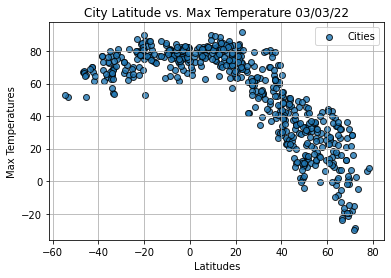

In [31]:
plt.scatter(lats, max_temps, edgecolor ="black", marker = "o", alpha=0.8, label="Cities")
plt.grid()
plt.legend()

plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Max Temperatures")
plt.savefig("weather_data/Fig.png")
plt.show()

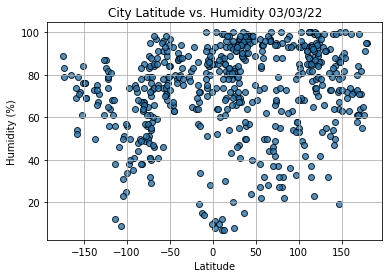

In [33]:
plt.scatter(lngs, humidity, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


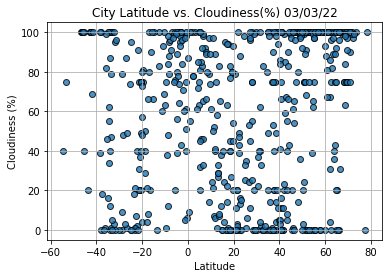

In [34]:
plt.scatter(lats, cloudiness, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
plt.scatter(lngs, wind_speed, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Longitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()